# Определение перспективного тарифа для телеком компании

*Проведем предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем поведение клиентов и сделаем вывод — какой тариф лучше.*

## Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
calls=pd.read_csv('/datasets/calls.csv')
internet=pd.read_csv('/datasets/internet.csv')
messages=pd.read_csv('/datasets/messages.csv')
tariffs=pd.read_csv('/datasets/tariffs.csv')
users=pd.read_csv('/datasets/users.csv')

*Посмотрим общую информацию по таблицам*

In [2]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод**
В таблице internet обнаружен лишний столбец, далее нам нужно будет удалить его. В таблице users необходимо будет привести к 
нижнему регистру имена клиентов и города их проживания. Также изменим тип некоторых данных.


# Подготовка данных

*Удалим столбец 'Unnamed: 0'*

In [12]:
del internet['Unnamed: 0']

In [13]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


*Приведем к нижнему регистру столбцы city, first_name, last_name.*

In [14]:
users['city']=users['city'].str.lower()

In [15]:
users['first_name']=users['first_name'].str.lower()

In [16]:
users['last_name']=users['last_name'].str.lower()

In [17]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra
1,1001,41,NaN,москва,иван,ежов,2018-11-01,smart
2,1002,59,NaN,стерлитамак,евгений,абрамович,2018-06-17,smart
3,1003,23,NaN,москва,белла,белякова,2018-08-17,ultra
4,1004,68,NaN,новокузнецк,татьяна,авдеенко,2018-05-14,ultra


In [18]:
users.duplicated().sum()

0

*Округлим длительность звонков duration*

In [19]:
calls['duration']=np.ceil(calls['duration'])
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


*Удалим звонки длительностью 0 минут и строки с неиспользованными мб интернета*

In [20]:
calls=calls.drop(calls.loc[calls['duration']==0.0]. index)

In [21]:
internet['mb_used']=np.ceil(internet['mb_used'])

In [22]:
internet=internet.drop(internet.loc[internet['mb_used']==0.0]. index)

*Рассчитаем кол-во и длительность звонков, сообщений и потраченного трафика для каждого пользователя ежемесячно*

In [23]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [24]:
calls.columns=['call_id','call_date','duration','user_id','month']

In [25]:
duration_per_month=calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='sum')
display(duration_per_month)

duration
user_id month          
1000    5         159.0
        6         172.0
        7         340.0
        8         408.0
        9         466.0
...                 ...
1498    10        247.0
1499    9          70.0
        10        449.0
        11        612.0
        12        492.0

[3168 rows x 1 columns]

In [26]:
calls_per_month=calls.pivot_table(index=['user_id','month'], values='call_id', aggfunc='count')
display(calls_per_month)

call_id
user_id month         
1000    5           17
        6           28
        7           41
        8           42
        9           46
...                ...
1498    10          30
1499    9            8
        10          44
        11          62
        12          56

[3168 rows x 1 columns]

In [27]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [28]:
messages.columns=['message_id','message_date','user_id','month']

In [29]:
messages_per_month=messages.pivot_table(index=['user_id','month'], values='message_id', aggfunc='count')
display(messages_per_month)

message_id
user_id month            
1000    5              22
        6              60
        7              75
        8              81
        9              57
...                   ...
1498    10             42
1499    9              11
        10             48
        11             59
        12             66

[2717 rows x 1 columns]

In [30]:
internet['month']=pd.DatetimeIndex(internet['session_date']).month

In [31]:
internet.columns=['internet_id','mb_used','session_date','user_id','month']

In [32]:
internet_per_month=internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
internet_per_month['gb_used']=internet_per_month['mb_used'].apply(lambda x: np.ceil(x/1024))
display(internet_per_month)


mb_used  gb_used
user_id month                  
1000    5       2256.0      3.0
        6      23257.0     23.0
        7      14016.0     14.0
        8      14070.0     14.0
        9      14581.0     15.0
...                ...      ...
1498    10     20604.0     21.0
1499    9       1848.0      2.0
        10     17809.0     18.0
        11     17984.0     18.0
        12     13077.0     13.0

[3201 rows x 2 columns]

In [33]:
tariff_city=users[['user_id','tariff','city']]

In [34]:
new_table=pd.concat([calls_per_month,duration_per_month,messages_per_month,internet_per_month], axis=1)
new_table=new_table.reset_index()
new_table=new_table.merge(tariff_city, on='user_id', how='left')

In [35]:
new_table.isna().mean()

user_id       0.000000
month         0.000000
call_id       0.014312
duration      0.014312
message_id    0.154636
mb_used       0.004045
gb_used       0.004045
tariff        0.000000
city          0.000000
dtype: float64

*После рассчетов мы обнаружили пропуски в данных. Это может быть связно с тем, что некотрые клиенты, к примеру, не пользуются мобильным интернетом или не пишут sms-сообщения. Заполним пропуски нулями*

In [36]:
new_table['message_id']=new_table['message_id'].fillna('0').astype('int')
new_table['call_id']=new_table['call_id'].fillna('0').astype('int')
new_table['duration']=new_table['duration'].fillna('0').astype('int')
new_table['mb_used']=new_table['mb_used'].fillna('0').astype('int')
new_table['gb_used']=new_table['gb_used'].fillna('0').astype('int')

In [37]:
new_table.head(10)

,user_id,month,call_id,duration,message_id,mb_used,gb_used,tariff,city
0,1000,5,17,159,22,2256,3,ultra,краснодар
1,1000,6,28,172,60,23257,23,ultra,краснодар
2,1000,7,41,340,75,14016,14,ultra,краснодар
3,1000,8,42,408,81,14070,14,ultra,краснодар
4,1000,9,46,466,57,14581,15,ultra,краснодар
5,1000,10,44,350,73,14717,15,ultra,краснодар
6,1000,11,37,338,58,14768,15,ultra,краснодар
7,1000,12,38,333,70,9827,10,ultra,краснодар
8,1001,11,45,430,0,18452,19,smart,москва
9,1001,12,47,414,0,14053,14,smart,москва


*Посчитаем ежемесячную выручку по каждому клиенту*

In [38]:
new_names=['user_id','month','call_id','duration','message_id','mb_used','gb_used','tariff_name','city']

In [39]:
new_table.set_axis(new_names,axis='columns',inplace=True)

In [40]:
new_table=new_table.merge(tariffs, on='tariff_name', how='left')
new_table['gb_per_month_included']=new_table['mb_per_month_included'].apply(lambda x: x/1024 )
new_table.head()

,user_id,month,call_id,duration,message_id,mb_used,gb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,17,159,22,2256,3,ultra,краснодар,1000,30720,3000,1950,150,1,1,30.0
1,1000,6,28,172,60,23257,23,ultra,краснодар,1000,30720,3000,1950,150,1,1,30.0
2,1000,7,41,340,75,14016,14,ultra,краснодар,1000,30720,3000,1950,150,1,1,30.0
3,1000,8,42,408,81,14070,14,ultra,краснодар,1000,30720,3000,1950,150,1,1,30.0
4,1000,9,46,466,57,14581,15,ultra,краснодар,1000,30720,3000,1950,150,1,1,30.0


In [41]:
def income_calls(row):
    tariff=row['tariff_name']
    duration=row['duration']
    minutes_included=row['minutes_included']
    rub_per_minute=row['rub_per_minute']
    for row in new_table:
        if tariff=='ultra':
            if duration<=minutes_included:
                return 0
            else:
                return ((duration-minutes_included)*rub_per_minute)
        if tariff=='smart':
            if duration<=minutes_included:
                return 0
            else:
                return ((duration-minutes_included)*rub_per_minute)
            
new_table['income_calls']=new_table.apply(income_calls, axis=1)          

In [42]:
def income_messages(row):
    tariff=row['tariff_name']
    message_id=row['message_id']
    messages_included=row['messages_included']
    rub_per_message=row['rub_per_message']
    for row in new_table:
        if tariff=='ultra':
            if message_id<= messages_included:
                return 0
            else:
                return ((message_id-messages_included)*rub_per_message)
        if tariff=='smart':
            if message_id<= messages_included:
                return 0
            else:
                return ((message_id-messages_included)*rub_per_message)
            
new_table['income_messages']=new_table.apply(income_messages, axis=1)

In [43]:
def income_internet(row):
    tariff=row['tariff_name']
    gb_used=row['gb_used']
    gb_per_month_included=row['gb_per_month_included']
    rub_per_gb=row['rub_per_gb']
    
    for row in new_table:
        if tariff=='ultra':
            if gb_used<= gb_per_month_included:
                return 0
            else:
                return (gb_used-gb_per_month_included)*rub_per_gb
        if tariff=='smart':
            if gb_used<= gb_per_month_included:
                return 0
            else:
                return (gb_used-gb_per_month_included)*rub_per_gb
            
new_table['income_internet']=new_table.apply(income_internet, axis=1)

In [44]:
def total_income(row):
    tariff=row['tariff_name']
    income_calls=row['income_calls']
    income_messages=row['income_messages']
    income_internet=row['income_internet']
    rub_monthly_fee=row['rub_monthly_fee']
    for row in new_table:
        if tariff=='ultra':
            return (income_calls+income_messages+income_internet+rub_monthly_fee)
        else:
            return (income_calls+income_messages+income_internet+rub_monthly_fee)
new_table['total_income']=new_table.apply(total_income, axis=1)

In [45]:
display(new_table)

,user_id,month,call_id,duration,message_id,mb_used,gb_used,tariff_name,city,messages_included,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income_calls,income_messages,income_internet,total_income
0,1000,5,17,159,22,2256,3,ultra,краснодар,1000,...,3000,1950,150,1,1,30.0,0,0,0.0,1950.0
1,1000,6,28,172,60,23257,23,ultra,краснодар,1000,...,3000,1950,150,1,1,30.0,0,0,0.0,1950.0
2,1000,7,41,340,75,14016,14,ultra,краснодар,1000,...,3000,1950,150,1,1,30.0,0,0,0.0,1950.0
3,1000,8,42,408,81,14070,14,ultra,краснодар,1000,...,3000,1950,150,1,1,30.0,0,0,0.0,1950.0
4,1000,9,46,466,57,14581,15,ultra,краснодар,1000,...,3000,1950,150,1,1,30.0,0,0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30,247,42,20604,21,smart,владикавказ,50,...,500,550,200,3,3,15.0,0,0,1200.0,1750.0
3210,1499,9,8,70,11,1848,2,smart,пермь,50,...,500,550,200,3,3,15.0,0,0,0.0,550.0
3211,1499,10,44,449,48,17809,18,smart,пермь,50,...,500,550,200,3,3,15.0,0,0,600.0,1150.0
3212,1499,11,62,612,59,17984,18,smart,пермь,50,...,500,550,200,3,3,15.0,336,27,600.0,1513.0


**Вывод:**
Мы посчитали реальный расход минут, сообщений и интернет-трафика для каждого клиента и на основе этих данных посчитали ежемесячную выручку. Также заполнили пропсуки, появившиеся в результате расчетов.

## Анализ данных

*Выделим в отдельные группы пользователей каждого тарифа*

In [46]:
new_table_ultra=new_table.query('tariff_name=="ultra"')


In [47]:
new_table_smart=new_table.query('tariff_name=="smart"')

*Рассчитаем среднее, дисперсию и среднее квадратичное отклонение по длительности звонков, кол-ву сообщений и использованных гб трафика для пользователей каждого тарифа*

In [48]:
new_table_ultra['duration'].mean()

526.6233502538071

In [49]:
new_table_smart['duration'].mean()

417.9349484073576

In [50]:
var_duration_ultra=np.var(new_table_ultra['duration'], ddof=1)
print(var_duration_ultra)

100873.63339730098


In [51]:
var_duration_smart=np.var(new_table_smart['duration'], ddof=1)
print(var_duration_smart)

36219.31578434428


In [52]:
stand_dur_ultra=np.std(new_table_ultra['duration'], ddof=1)
print(stand_dur_ultra)

317.6060978591264


In [53]:
stand_dur_smart=np.std(new_table_smart['duration'], ddof=1)
print(stand_dur_smart)

190.31372988921288


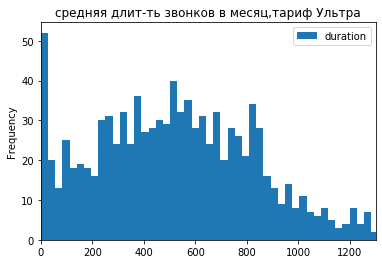

In [54]:
import matplotlib.pyplot as plt
new_table_ultra['duration'].plot(kind='hist',bins=60, x='duration',y='count',xlim=(0,1300), legend=True,title='средняя длит-ть звонков в месяц,тариф Ультра')
                          

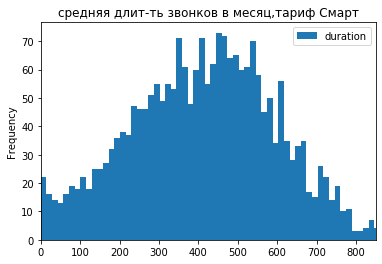

In [55]:
new_table_smart['duration'].plot(x='duration',y='count',kind='hist',bins=100,xlim=(0,850),legend=True, title='средняя длит-ть звонков в месяц,тариф Смарт')

*Из наших расчетов видно, что среднее длительности разговоров у пользователей тарифов Ультра и Смарт отличается не сильно, зато дисперсия различается практически в три раза. По гистограмме видим, что 
у клинтов с тарифом Смарт часто встречаются звонки длительностью 0 минут (возможно, пропущенные).Также следует отметить, что люди, выбравшие тариф Ультра используют намного меньше минут, чем включено в их тариф: 1200-1300 минут - это практически максимальная длительность разговоров. Пользователи тарифа Смарт в среднем используют практически столько же минут, сколько включено в их тариф. То есть, несмотря на разные условия тарифов, на обоих тарифах люди в среднем говорят по 400-500 минут в месяц.*

In [56]:
new_table_ultra['message_id'].mean()

49.36345177664975

In [57]:
new_table_smart['message_id'].mean()

33.384028712427096

In [58]:
var_mes_ultra=np.var(new_table_ultra['message_id'], ddof=1)
print(var_mes_ultra)

2285.266142544674


In [59]:
var_mes_smart=np.var(new_table_smart['message_id'], ddof=1)
print(var_mes_smart)

796.8129584480083


In [60]:
stand_mes_ultra=np.std(new_table_ultra['message_id'], ddof=1)
print(stand_mes_ultra)

47.80445735017472


In [61]:
stand_mes_smart=np.std(new_table_smart['message_id'], ddof=1)
print(stand_mes_smart)

28.22787555676141


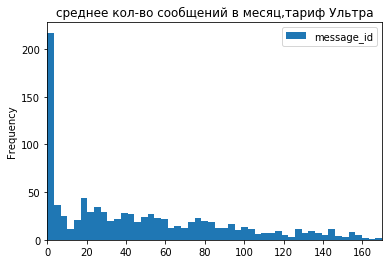

In [62]:
new_table_ultra['message_id'].plot(x='message_id', y='count',kind='hist',bins=50, range=(0,170),xlim=(0,170), legend=True, title='среднее кол-во сообщений в месяц,тариф Ультра')

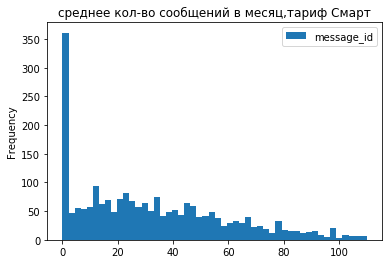

In [63]:
new_table_smart['message_id'].plot(x='message_id', y='count',kind='hist',bins=50, range=(0,110), legend=True, title='среднее кол-во сообщений в месяц,тариф Смарт')

*Из гистограммы и рассчетов видим, что на обоих тарифах клиенты очень часто вообще не используют смс-сообщения. Связано это, скорее всего, с наличием множества социальных сетей и мессенджеров. И если на тарифе Смарт пользователи еще хоть иногда выходят за лимит бесплатных сообщений, то в Ультра не используется и 10% от кол-ва включенных в тарфи смс-сообщений.*

In [64]:
new_table_ultra['gb_used'].mean()

19.525888324873097

In [65]:
new_table_smart['gb_used'].mean()

16.35935397039031

In [66]:
var_int_ultra=np.var(new_table_ultra['gb_used'], ddof=1)
print(var_int_ultra)

97.33494903223145


In [67]:
var_int_smart=np.var(new_table_smart['gb_used'], ddof=1)
print(var_int_smart)

33.16030407078876


In [68]:
stand_int_ultra=np.std(new_table_ultra['gb_used'], ddof=1)
print(stand_int_ultra)

9.865847608403014


In [69]:
stand_int_smart=np.std(new_table_smart['gb_used'], ddof=1)
print(stand_int_smart)

5.7584984215321935


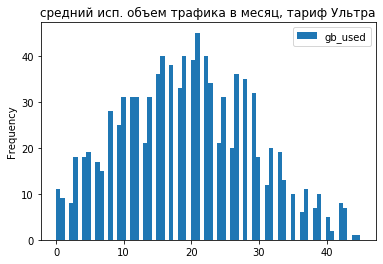

In [70]:
new_table_ultra['gb_used'].plot(x='gb_used', y='count',kind='hist',bins=70, range=(0,45),legend=True, title='средний исп. объем трафика в месяц, тариф Ультра')

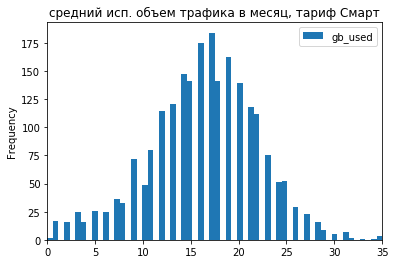

In [71]:
new_table_smart['gb_used'].plot(x='gb_used', y='count',kind='hist',bins=60, range=(0,35),xlim=(0,35),legend=True, title='средний исп. объем трафика в месяц, тариф Смарт')

*На гистограмме распределения интернет_трафика (и из расчетов) клиентов Мегалайн видно, что в среднем на обоих тарифах используется почти одинаковое кол-во гб (20 и 17). Следует отметить, что на тарифе ультра пользатели в основном укладываются в бесплатный пакет интернет_трафика в 30 гб, а вот на тарифе Смарт большая часть пользователей тратят больше гб, чем включено в их тариф (что подтверждает и среднее, которое уже больше включенных 15 гб).*

In [47]:

def analysis(df, usluga):
    pivot = df.pivot_table(index = 'tariff_name', values = usluga, aggfunc = ['mean', 'var', 'std'])
    print('Статистики по ', usluga)
    display(pivot)
    
    fig = px.histogram(df, x = usluga, color = 'tariff_name', marginal = 'box', title = 'Распределение '+usluga, template = 'plotly_dark')
    fig.show()
    
    fig = px.line(df.pivot_table(index = ['tariff_name', 'month'], values = usluga, aggfunc = 'mean').reset_index(), x = 'month', y = usluga, color = 'tariff_name', title = 'Средняя выручка в месяц '+usluga, template = 'plotly_dark')
    fig.show()
    
analysis(new_table, 'total_income')

Статистики по  total_income


,mean,var,std
,total_income,total_income,total_income
tariff_name,,,
smart,1294.63930,673931.321363,820.933202
ultra,2071.06599,143491.240560,378.802377


*Суммарная выручка по каждому из тарифов*

In [86]:
total_income_ultra=new_table_ultra['total_income'].sum()
print('Общая сумма выручки на тарифе Ультра:', total_income_ultra)
total_income_smart=new_table_smart['total_income'].sum()
print('Общая сумма выручки на тарифе Смарт:', total_income_smart)

Общая сумма выручки на тарифе Ультра: 2040000.0
Общая сумма выручки на тарифе Смарт: 2885751.0


*Выручка с одного клиента каждого из тарифов*

In [98]:
unique_income_ultra=total_income_ultra/len(new_table_ultra['user_id'].unique())
print('Средняя выручка с одного клиента тарифа Ультра:', unique_income_ultra)
unique_income_smart=total_income_smart/len(new_table_smart['user_id'].unique())
print('Средняя выручка с одного клиента тарифа Смарт:',unique_income_smart)

Средняя выручка с одного клиента тарифа Ультра: 13783.783783783783
Средняя выручка с одного клиента тарифа Смарт: 8245.002857142857


После проведенного анализа выручки мы можем сделать вывод, что несмотря на то, что клиенты тарифа Ультра редко выходят за лимиты, выручки они приносят больше. 

## Проверка гипотез

***Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается***

Ho= Средняя выручка пользователей тарифов Ультра и Смарт равна 

H1= Средняя выручка пользователей тарифов Ультра и Смарт различается

In [537]:
from scipy import stats as st

alpha=0.05

results = st.ttest_ind(new_table_ultra['total_income'],new_table_smart['total_income'] , equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 1.51935829990411e-274
Отвергаем нулевую гипотезу


Так-как мы отвергли нулевую гипотезу, то будем считать, что средняя выручка пользователей тарифов Ультра и Смарт различается

***Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов***

Ho= Средняя выручка пользователей из Москвы равна выручке пользователей из других городов

H1= Средняя выручка пользователей из Москвы не равна выручке пользователей из других городов

In [127]:
new_table_moscow=new_table.query('city=="москва"')

In [128]:
new_table_other=new_table.query('city!="москва"')

In [129]:
from scipy import stats as st

alpha=0.05

results = st.ttest_ind(new_table_moscow['total_income'],new_table_other['total_income'] ,
                       equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.46418055479264264
Не получилось отвергнуть нулевую гипотезу


У нас не получилось отвергнуть нулевую гипотезу, поэтому будем считать, что средняя выручка пользователей из Москвы равна выручке пользователей из других городов

## Общий вывод

Мы провели работу по исследованию поведения клиентов двух тарифов компании Мегалайн - Ультра и Смарт- на основе выборки, предоставленной нам, и сделали следующие выводы:
 * пользователи тарифа Ультра используют намного меньше минут, чем включено в их пакет и практически 
   не выходят за лимит
 * пользователи тарифа Смарт в среднем используют чуть меньше минут, чем включено в их тариф, но        всё-таки часто выходят за лимит (иногда тратя до 300 минут сверх включенного пакета) 
 * смс-сообщения клиенты обоих тарифов используют редко (в среднем 47 и 28 сообщений в месяц)
 * на тарифе Смарт редко, но все же иногда кол-во сообщений в месяц выходит за бесплатный лимит, на      тарифе Ультра не используется и 10% сообщений, включенных в пакет
 * использованное кол-во гб интернет-трафика на тарифе Ультра иногда выходят за лимит в 30 гб            (некоторыми клиентами используется до 45 гб)
 * использованное кол-во гб интернет-трафика на тарифе Смарт выходит за пределы лимита, в среднем        тратится 17 гб
 * путем проверки гипотез мы выяснили, что средняя выручка пользователей тарифов Ультра и Смарт          различается, а средняя выручка средняя пользователей из Москвы равна выручке пользователей из        других городов



**Рекомендации**

 * пересмотреть количество включенных в бесплатный пакет смс-сообщений на обоих тарифах
 * пересмотреть количество включенных в бесплатный пакет гб интернета на тарифе Смарт
 * несмотря на то, что клиенты тарифа Смарт часто выходят за лимиты включенного пакета звонков и гб      интернета, большую прибыль приносят клиенты тарифа Ультра, поэтому рекомендуем для дальнейшего        продвижения тариф Ультра
 
 